In [49]:
import xarray as xr
import pandas as pd
from pathlib import Path
import ast
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## checking for nans in SFE data

In [50]:
sfe = np.load("/scratch/users/ashdef/post_treatment_data/sfe_post_filtered.npz", allow_pickle = True)["sfe_list"] 
len(sfe)

11544

In [51]:
nan_pixels = []
for pixel in range (len(sfe)):
    if np.isnan(sfe[pixel]).sum() == len(sfe[pixel]) and np.isnan(sfe[pixel]).sum() != 0: # if all timesteps for that pixel are nan
        nan_pixels.append(pixel)
        print(len(sfe[pixel]))

print("Number of pixels with all NaNs = ", len(nan_pixels))

431
251
251
239
239
239
227
215
203
203
203
203
191
179
179
179
179
179
179
179
179
179
179
179
179
167
167
167
167
143
143
143
131
131
119
119
119
119
119
107
107
107
107
107
107
107
95
83
83
83
83
83
59
59
59
47
47
47
35
35
35
35
23
23
23
23
23
23
23
23
11
11
11
Number of pixels with all NaNs =  73


In [52]:
some_nans = []
for pixel in range (len(sfe)):
    if (np.isnan(sfe[pixel]).sum() > 0 and np.isnan(sfe[pixel]).sum() != len(sfe[pixel])): # there are nan months but not all
        # print("pixel id = ", pixel, ", # nans = ", np.isnan(sfe[pixel]).sum(), ", # pre-trtmt timesteps = ", len(sfe[pixel]))
        some_nans.append(pixel)

print("Number of pixels with NaN>0, less than # timesteps = ", len(some_nans))

Number of pixels with NaN>0, less than # timesteps =  6


In [61]:
# unfiltered pixel_treatment df used to build post-treatment arrays
# does not include pixels treated in 2023

pixel_treatment = pd.read_csv('/scratch/users/ashdef/post_treatment_data/pixel_treatment.csv')

In [62]:
# filter treated pixels df to only include rows that mach nan_pixels
# this works because I sorted the pixel_treatment_df to be in the same order it was when I read in the sfe arrays
nan_pixels_latlon = pixel_treatment[pixel_treatment.index.isin(nan_pixels)]
nan_pixels_latlon

,Unnamed: 0.1,Unnamed: 0,pixel_id,lat,lon,pixel_geometry,index_right,treatment_date,twig_categ,treatment_geometry
234,6701,259199,"(187, 17)",41.608333,-124.058333,POLYGON ((-13807791.335560022 5099387.83044729...,31019,1987-08-15,Mechanical,POLYGON Z ((-13812315.689399999 5099696.530199...
2256,9273,377037,"(272, 45)",38.066667,-122.891667,POLYGON ((-13677918.596301204 4585902.55051853...,50624,2002-10-25,Planned Ignition Planned Ignition,MULTIPOLYGON Z (((-13682411.820700001 4590509....
2257,9241,375651,"(271, 45)",38.108333,-122.891667,POLYGON ((-13677918.596301204 4591794.01309194...,50624,2002-10-25,Planned Ignition,POLYGON Z ((-13682247.5387 4591982.033799998 -...
2476,9436,383977,"(277, 55)",37.858333,-122.475000,POLYGON ((-13631535.475137336 4556495.37799283...,52431,2003-09-30,Mechanical,MULTIPOLYGON Z (((-13636174.1865 4558406.83529...
2510,4963,199596,"(144, 12)",43.400000,-124.266667,POLYGON ((-13830982.896141954 5369864.11719773...,54044,2003-10-16,Mechanical,POLYGON Z ((-13831124.898 5372492.2119999975 -...
...,...,...,...,...,...,...,...,...,...,...
10338,11207,499090,"(360, 130)",34.400000,-119.350000,POLYGON ((-13283662.066408359 4079829.18833839...,80481,2021-04-30,"Mechanical, Planned Ignition",POLYGON Z ((-13285526.4687 4085260.315899998 -...
10650,7110,282759,"(204, 15)",40.900000,-124.141667,POLYGON ((-13817067.959792795 4994535.07875649...,53292,2021-12-08,Planned Ignition,POLYGON Z ((-13819782.470800001 4997765.638999...
10755,12247,560128,"(404, 184)",32.566667,-117.100000,POLYGON ((-13033193.21212349 3835174.935146528...,53237,2022-04-15,"Chemical, Mechanical",POLYGON Z ((-13036137.1746 3837085.367200002 -...
11520,7316,289687,"(209, 13)",40.691667,-124.225000,POLYGON ((-13826344.584025567 4963910.22461854...,53214,2022-12-15,Planned Ignition,MULTIPOLYGON Z (((-13826686.5367 4966040.76569...


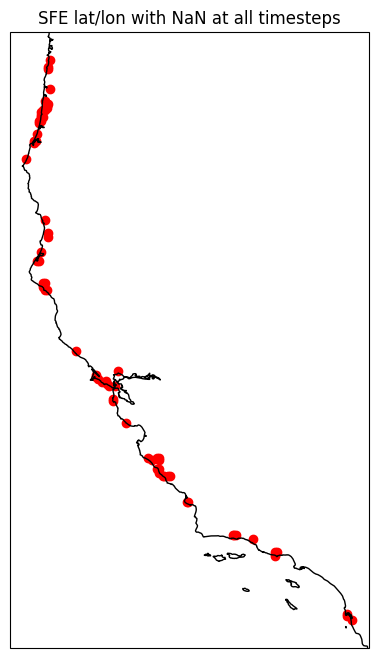

In [63]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

lat_vals = nan_pixels_latlon['lat'].values
lon_vals = nan_pixels_latlon['lon'].values
# print(lon_vals.min(), lon_vals.max())
# print(lat_vals.min(), lon_vals.max())

ax.scatter(lon_vals, lat_vals, color = 'red', transform = ccrs.PlateCarree())
ax.coastlines()

plt.title("SFE lat/lon with NaN at all timesteps")

plt.show()

In [64]:
some_nans[:5]

[682, 770, 899, 904, 1101]

In [6]:
sfe[682] 

array([0.24468257, 0.78755711, 1.43114783, 2.91095046, 3.59340452,
       4.31230474, 4.53042556, 3.76400144, 2.36319191, 1.14137134,
       0.32563207, 0.08382234, 0.19481777, 0.68005946, 1.85547104,
       2.6483417 , 3.70464348, 4.72312163, 4.65450673, 3.99850015,
       2.29675352, 1.45704701, 0.32945168, 0.07431551, 0.21209674,
       0.77706964, 1.49560051, 2.83755459, 3.73482149, 4.72335321,
       4.24656722, 3.88830886,        nan, 1.33463762, 0.38504504,
       0.03509752, 0.1766347 , 1.04006564, 1.67793682, 2.65298551,
       3.20081876, 4.47035827, 4.69970199, 3.96559676, 2.56398319,
       1.52453183, 0.23216536, 0.08985784])

In [9]:
few_nans_latlon = pixel_treatment[pixel_treatment.index.isin(some_nans)]

In [10]:
few_nans_latlon.head()

,index,Unnamed: 0,pixel_id,lat,lon,pixel_geometry,index_right,treatment_date,twig_categ,treatment_geometry
682,5682,224541,"(162, 9)",42.650000,-124.391667,POLYGON ((-13844897.832491115 5255696.49416002...,45299,1989-11-14,Mechanical,POLYGON Z ((-13847111.504700001 5261554.302000...
770,486,41596,"(30, 16)",48.150000,-124.100000,POLYGON ((-13812429.647676406 6128370.53023572...,40224,1990-08-08,Mechanical,POLYGON Z ((-13813450.6513 6128956.180200003 -...
899,6758,263360,"(190, 20)",41.483333,-123.933333,"POLYGON ((-13793876.399210863 5080801.5267523,...",31005,1991-06-15,Mechanical Mechanical,MULTIPOLYGON Z (((-13793150.802099999 5085575....
904,6746,261974,"(189, 20)",41.525000,-123.933333,POLYGON ((-13793876.399210863 5086992.97312859...,31015,1991-06-15,Mechanical Mechanical,MULTIPOLYGON Z (((-13794796.661600001 5092217....
1101,5683,224542,"(162, 10)",42.650000,-124.350000,POLYGON ((-13840259.520374725 5255696.49416002...,34430,1992-10-14,Mechanical,POLYGON Z ((-13840919.5868 5262075.689900003 -...


In [11]:
sfe_original = xr.open_dataset("/scratch/users/ashdef/SFE_monthly/SFE_monthly_skipna.nc")
sfe_original


<xarray.Dataset> Size: 3GB
Dimensions:  (time: 468, lat: 585, lon: 1386)
Coordinates:
  * lat      (lat) float64 5kB 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * lon      (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * time     (time) datetime64[ns] 4kB 1985-01-01 1985-02-01 ... 2023-12-01
Data variables:
    ET       (time, lat, lon) float64 3GB ...

In [13]:
few_nans_sfe_xr = sfe_original.sel(lat = xr.DataArray(few_nans_latlon['lat']), lon = xr.DataArray(few_nans_latlon['lon']), method = 'nearest')
few_nans_sfe_xr

<xarray.Dataset> Size: 222kB
Dimensions:  (time: 468, dim_0: 58)
Coordinates:
    lat      (dim_0) float64 464B 42.65 48.15 41.48 41.53 ... 43.28 42.19 43.23
    lon      (dim_0) float64 464B -124.4 -124.1 -123.9 ... -124.1 -124.3 -124.2
  * time     (time) datetime64[ns] 4kB 1985-01-01 1985-02-01 ... 2023-12-01
  * dim_0    (dim_0) int64 464B 682 770 899 904 1101 ... 12199 12206 12207 12219
Data variables:
    ET       (time, dim_0) float64 217kB ...

In [18]:
nan_times = few_nans_sfe_xr.ET.isnull().any(dim=["dim_0"])
nan_times = few_nans_sfe_xr.time[nan_times]
print(nan_times)

<xarray.DataArray 'time' (time: 468)> Size: 4kB
array(['1985-01-01T00:00:00.000000000', '1985-02-01T00:00:00.000000000',
       '1985-03-01T00:00:00.000000000', ..., '2023-10-01T00:00:00.000000000',
       '2023-11-01T00:00:00.000000000', '2023-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1985-01-01 1985-02-01 ... 2023-12-01
Attributes:
    description:    days since 1900-01-01
    long_name:      time
    standard_name:  time


In [15]:
nan_times['time']

<xarray.DataArray 'time' (time: 468)> Size: 4kB
array(['1985-01-01T00:00:00.000000000', '1985-02-01T00:00:00.000000000',
       '1985-03-01T00:00:00.000000000', ..., '2023-10-01T00:00:00.000000000',
       '2023-11-01T00:00:00.000000000', '2023-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1985-01-01 1985-02-01 ... 2023-12-01
Attributes:
    description:    days since 1900-01-01
    long_name:      time
    standard_name:  time

## filter arrays and pixel_treatment df to exclude pixels with any nans post-treatment

In [65]:
sfe = np.load("/scratch/users/ashdef/post_treatment_data/sfe_post_filtered.npz", allow_pickle = True)["sfe_list"] 


In [66]:
len(sfe)

11544

In [67]:
anynan_pixels = []
for pixel in range (len(sfe)):
    if np.isnan(sfe[pixel]).sum()>0: # if any timesteps are nan, ie it is a coastal pixel or includes a monthly nan
        anynan_pixels.append(pixel)

print("Number of pixels with any NaNs = ", len(anynan_pixels))


Number of pixels with any NaNs =  79


In [69]:
print(len(pixel_treatment))

11544


In [70]:
pixel_treatment_nonans = pixel_treatment[~pixel_treatment.index.isin(anynan_pixels)] # keeping rows if indices are not in the list of nan pixel ids

In [73]:
pixel_treatment_nonans = pixel_treatment_nonans.rename(columns = {'Unnamed: 0' : 'sfe_df_index', 'Unnamed: 0.1' : 'index'})
pixel_treatment_nonans

,index,sfe_df_index,pixel_id,lat,lon,pixel_geometry,index_right,treatment_date,twig_categ,treatment_geometry
0,2190,116676,"(84, 252)",45.900000,-114.266667,POLYGON ((-12717787.98820922 5761006.692671617...,5439,1986-01-01,Mechanical,MULTIPOLYGON Z (((-12717456.6514 5760763.97770...
1,6039,234246,"(169, 12)",42.358333,-124.266667,POLYGON ((-13830982.896141954 5211670.14706264...,46058,1986-01-01,Mechanical,POLYGON Z ((-13834012.5258 5218561.729099996 -...
2,3344,152619,"(110, 159)",44.816667,-118.141667,POLYGON ((-13149151.015033154 5589436.68652023...,44196,1986-01-07,Mechanical,POLYGON Z ((-13154055.344700001 5588978.509900...
3,10973,482615,"(348, 287)",34.900000,-112.808333,POLYGON ((-12555447.064135693 4147472.47688450...,23130,1986-02-01,Mechanical,POLYGON Z ((-12558898.384 4150060.4245000035 -...
4,4535,184401,"(133, 63)",43.858333,-122.141667,POLYGON ((-13594428.978206249 5440329.27497087...,35229,1986-02-01,Mechanical Mechanical,MULTIPOLYGON Z (((-13598303.988699999 5443431....
...,...,...,...,...,...,...,...,...,...,...
11539,7423,292790,"(211, 344)",40.608333,-110.433333,POLYGON ((-12291063.273501668 4951687.08824967...,27122,2022-12-22,Unknown,POLYGON Z ((-12295149.8972 4954001.159599997 -...
11540,4173,173637,"(125, 387)",44.191667,-108.641667,POLYGON ((-12091615.852497054 5491917.20746013...,54110,2022-12-27,Chemical,MULTIPOLYGON Z (((-12093931.5276 5495225.02449...
11541,4174,173638,"(125, 388)",44.191667,-108.600000,POLYGON ((-12086977.540380666 5491917.20746013...,54110,2022-12-27,Chemical,MULTIPOLYGON Z (((-12093931.5276 5495225.02449...
11542,727,50058,"(36, 162)",47.900000,-118.016667,POLYGON ((-13135236.078683995 6086775.96415573...,52676,2022-12-28,Mechanical,MULTIPOLYGON Z (((-13135594.3514 6088755.27740...


In [74]:
pixel_treatment_nonans.to_csv('/scratch/users/ashdef/post_treatment_data/no_nans/pixel_treatment.csv')

In [75]:
non_nan_sfe = []

for pixel in range(len(sfe)):
    if (np.isnan(sfe[pixel]).sum() ==0):
        non_nan_sfe.append(sfe[pixel])

print(len(non_nan_sfe))

11465


In [76]:
sfe_obj = np.array(non_nan_sfe, dtype=object)
np.savez_compressed("/scratch/users/ashdef/post_treatment_data/no_nans/sfe_post_arrays.npz", sfe_pre = sfe_obj)


In [77]:
climate_pre = np.load("/scratch/users/ashdef/post_treatment_data/climate_post_filtered.npz", allow_pickle = True)["climate_list"]

In [78]:
len(climate_pre[0])

443

In [79]:
non_nan_climate = []

for pixel in range(len(sfe)):
    if (np.isnan(sfe[pixel]).sum() ==0 ):
        non_nan_climate.append(climate_pre[pixel])

print(len(non_nan_climate))

11465


In [80]:
clim_obj = np.array(non_nan_climate, dtype=object)
np.savez_compressed("/scratch/users/ashdef/post_treatment_data/no_nans/climate_post_arrays.npz", clim_pre = clim_obj)


In [81]:
sfe = np.load("/scratch/users/ashdef/post_treatment_data/no_nans/sfe_post_arrays.npz", allow_pickle = True)["sfe_pre"] 


In [82]:
sfe.shape

(11465,)

In [83]:
sfe_nans = []

for pixel in range(len(sfe)):
    if (np.isnan(sfe[pixel]).sum() >0 ):
        sfe_nans.append(sfe[pixel])

print(len(sfe_nans))

0
